<a href="https://colab.research.google.com/github/parsh-waah/S-P500_prediction/blob/main/S%26P_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gathering Data from yfinance library

In [ ]:
!pip install yfinance
print('done')

     |████████████████████████████████| 6.4 MB 10.8 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
done


In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
snp_df = yf.download('^GSPC', 
                      start='1982-05-01', 
                      end='2022-02-24', 
                      progress=True,
)
snp_df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-05-03,115.959999,116.820000,115.910004,116.820000,116.820000,46490000
1982-05-04,117.410004,117.639999,116.849998,117.459999,117.459999,58720000
1982-05-05,117.849998,118.050003,117.309998,117.669998,117.669998,58860000
1982-05-06,118.820000,118.830002,117.680000,118.680000,118.680000,67540000
1982-05-07,119.080002,119.889999,118.709999,119.470001,119.470001,67130000


In [ ]:
snp_df['Volume'].describe()

count    1.003900e+04
mean     1.904520e+09
std      1.846494e+09
min      1.499000e+07
25%      2.129350e+08
50%      1.257200e+09
75%      3.428180e+09
max      1.145623e+10
Name: Volume, dtype: float64

In [ ]:
co = (snp_df['Open']==0).sum()
print(co)

0


In [ ]:
snp_df.drop('Adj Close',axis=1,inplace=True)
print(snp_df.head())
print(snp_df.shape)

                  Open        High         Low       Close    Volume
Date                                                                
1982-05-03  115.959999  116.820000  115.910004  116.820000  46490000
1982-05-04  117.410004  117.639999  116.849998  117.459999  58720000
1982-05-05  117.849998  118.050003  117.309998  117.669998  58860000
1982-05-06  118.820000  118.830002  117.680000  118.680000  67540000
1982-05-07  119.080002  119.889999  118.709999  119.470001  67130000
(10039, 5)


Setting the index of the dataset

In [ ]:
index=[]
index1=[]
for i in range(10039):
  index1.append(i)

index = pd.Index(index1)
snp_df = snp_df.set_index(index)
print(snp_df)

              Open         High          Low        Close      Volume
0       115.959999   116.820000   115.910004   116.820000    46490000
1       117.410004   117.639999   116.849998   117.459999    58720000
2       117.849998   118.050003   117.309998   117.669998    58860000
3       118.820000   118.830002   117.680000   118.680000    67540000
4       119.080002   119.889999   118.709999   119.470001    67130000
...            ...          ...          ...          ...         ...
10034  4455.750000  4489.549805  4429.680176  4475.009766  3478750000
10035  4456.060059  4456.060059  4373.810059  4380.259766  3596510000
10036  4384.569824  4394.600098  4327.220215  4348.870117  3871340000
10037  4332.740234  4362.120117  4267.109863  4304.759766  4007780000
10038  4324.930176  4341.509766  4221.509766  4225.500000  3814340000

[10039 rows x 5 columns]


Replacing 0 value in Open as the windowed average of its corresponding 10 entries.

In [ ]:
snp_df[(snp_df.values == 0).any(axis=1)].index.values.tolist()

[]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
sc = MinMaxScaler(feature_range = (0, 1))
snp_df = sc.fit_transform(np.array(snp_df))

In [ ]:
print(snp_df[-1])
print(snp_df.shape)

[0.89800714 0.8988232  0.88060082 0.87834618 0.33207502]
(10039, 5)


Splitting dataset as 80% training data, 10% validation set, 10% test set

In [ ]:
#import numpy as np
train, validate, test = \
              np.split(snp_df, 
                       [int(.8*len(snp_df)), int(.9*len(snp_df))])


In [ ]:
print(train.shape)
print(test.shape)
print(validate.shape)

(8031, 5)
(1004, 5)
(1004, 5)


In [ ]:
print(train[0:5])
print(validate[0:5])
print(test[0:5])

[[0.00287957 0.00292857 0.00293084 0.00306765 0.0027532 ]
 [0.00318795 0.00310246 0.00313179 0.00320399 0.00382214]
 [0.00328152 0.00318941 0.00323012 0.00324873 0.00383437]
 [0.00348781 0.00335482 0.00330922 0.00346389 0.00459303]
 [0.00354311 0.0035796  0.00352941 0.00363219 0.0045572 ]]
[[0.37680269 0.37724279 0.37880305 0.37804795 0.29240362]
 [0.37772567 0.37758846 0.37802919 0.37826311 0.3102592 ]
 [0.3775853  0.37637972 0.3772767  0.37807778 0.26276522]
 [0.37767038 0.37732975 0.37660116 0.37604545 0.29519615]
 [0.37509493 0.37436725 0.37457031 0.37616687 0.28457318]]
[[0.55566782 0.55727251 0.54671598 0.54860952 0.39235083]
 [0.54368802 0.54992672 0.54408018 0.5515025  0.33802805]
 [0.54840298 0.55667878 0.55015776 0.5578274  0.32302618]
 [0.55884938 0.5575249  0.55774887 0.559357   0.29329863]
 [0.55459595 0.55721106 0.55571374 0.55907579 0.29527219]]


don't execute

In [ ]:
co1 = (train['Open']==0).sum()
print(co1)

0


In [ ]:
print(test.describe())
print(validate.describe())

              Open         High          Low        Close        Volume
count  1004.000000  1004.000000  1004.000000  1004.000000  1.004000e+03
mean   3353.670011  3372.124134  3333.091685  3353.789936  3.967019e+09
std     668.857072   670.368763   667.465163   668.966712  1.135248e+09
min    2290.709961  2300.729980  2191.860107  2237.399902  1.296540e+09
25%    2819.539978  2836.532471  2801.542542  2818.730042  3.260862e+09
50%    3087.214966  3100.405029  3074.225098  3092.460083  3.664790e+09
75%    3895.352539  3918.647583  3877.432434  3903.042542  4.392310e+09
max    4804.509766  4818.620117  4780.040039  4796.560059  9.878040e+09
              Open         High          Low        Close        Volume
count  1004.000000  1004.000000  1004.000000  1004.000000  1.004000e+03
mean   2171.159859  2180.037491  2161.510948  2171.577062  3.593113e+09
std     233.305045   232.602179   234.453360   233.404760  7.060292e+08
min    1818.180054  1834.189941  1810.099976  1815.689941  1.349

Normalizing data using linear scaling

In [ ]:
min=[]
for i in train.min():
  min.append(i)

max=[]
for i in test.max():
  max.append(i)
  
print(min)
print(max)

[102.41999816894531, 103.01000213623047, 102.19999694824219, 102.41999816894531, 14990000.0]
[4804.509765625, 4818.6201171875, 4780.0400390625, 4796.56005859375, 9878040000.0]


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))
#train_scaled = sc.fit_transform(train)
#validate_scaled = sc.fit_transform(validate)
#test_scaled = sc.fit_transform(test)

In [ ]:
print(train.shape)
print(validate.shape)
print(test.shape)

(8031, 5)
(1004, 5)
(1004, 5)


In [ ]:
validate=validate.to_numpy(dtype=float)

In [ ]:
difference0=[]
difference1=[]
for i in range(1004):
  zip_object0 = zip(validate[i], min)
  for list1_i, list2_i in zip_object0:
    difference0.append(list1_i-list2_i)

zip_object1 = zip(max,min)
for list1_i, list2_i in zip_object1:
    difference1.append(list1_i-list2_i)

chunked_list=[]
chunk_size = 5
for i in range(0, len(difference0), chunk_size):
    chunked_list.append(difference0[i:i+chunk_size])
#print(np.array(chunked_list))  #df-min

#print(difference0)
#print(difference1)

validate_scaled=np.array(chunked_list)/np.array(difference1)
print(validate_scaled)   #df-min/max-min

#res = np.array(chunked_list) * np.array(difference1)
#print(res)

#validate_scaled = np.array(res) + np.array(min)
#print(validate_scaled)

[[0.37680269 0.37724279 0.37880305 0.37804795 0.33919122]
 [0.37772567 0.37758846 0.37802919 0.37826311 0.35990388]
 [0.3775853  0.37637972 0.3772767  0.37807778 0.30481038]
 ...
 [0.56463195 0.56782258 0.56683854 0.57032386 0.34570037]
 [0.56954037 0.56962722 0.56479485 0.56279958 0.37818829]
 [0.56386844 0.56376799 0.55823628 0.55631277 0.42742052]]


In [ ]:
train=train.to_numpy(dtype=float)

In [ ]:
difference0=[]
for i in range(8031):
  zip_object0 = zip(train[i], min)
  for list1_i, list2_i in zip_object0:
    difference0.append(list1_i-list2_i)

chunked_list=[]
chunk_size = 5
for i in range(0, len(difference0), chunk_size):
    chunked_list.append(difference0[i:i+chunk_size])

train_scaled=np.array(chunked_list)/np.array(difference1)
print(train_scaled)

[[0.00287957 0.00292857 0.00293084 0.00306765 0.00319374]
 [0.00318795 0.00310246 0.00313179 0.00320399 0.00443372]
 [0.00328152 0.00318941 0.00323012 0.00324873 0.00444791]
 ...
 [0.37329361 0.3720982  0.37030765 0.37138005 0.34606232]
 [0.37149652 0.37603193 0.37346937 0.37738329 0.38028602]
 [0.37677504 0.37609556 0.37814675 0.377362   0.34249041]]


In [ ]:
test=test.to_numpy(dtype=float)

In [ ]:
difference0=[]
for i in range(1004):
  zip_object0 = zip(test[i], min)
  for list1_i, list2_i in zip_object0:
    difference0.append(list1_i-list2_i)

chunked_list=[]
chunk_size = 5
for i in range(0, len(difference0), chunk_size):
    chunked_list.append(difference0[i:i+chunk_size])

test_scaled=np.array(chunked_list)/np.array(difference1)
print(test_scaled)

[[0.55566782 0.55727251 0.54671598 0.54860952 0.45513102]
 [0.54368802 0.54992672 0.54408018 0.5515025  0.39211603]
 [0.54840298 0.55667878 0.55015776 0.5578274  0.3747137 ]
 ...
 [0.91069079 0.91008162 0.90319895 0.90462791 0.3909896 ]
 [0.89966811 0.90319386 0.89034893 0.89523101 0.40482305]
 [0.89800714 0.8988232  0.88060082 0.87834618 0.38521046]]


In [ ]:
print(train_scaled[:5])
print(validate_scaled[:5])
print(test_scaled[:5])

[[0.00287957 0.00292857 0.00293084 0.00306765 0.00319374]
 [0.00318795 0.00310246 0.00313179 0.00320399 0.00443372]
 [0.00328152 0.00318941 0.00323012 0.00324873 0.00444791]
 [0.00348781 0.00335482 0.00330922 0.00346389 0.00532797]
 [0.00354311 0.0035796  0.00352941 0.00363219 0.0052864 ]]
[[0.37680269 0.37724279 0.37880305 0.37804795 0.33919122]
 [0.37772567 0.37758846 0.37802919 0.37826311 0.35990388]
 [0.3775853  0.37637972 0.3772767  0.37807778 0.30481038]
 [0.37767038 0.37732975 0.37660116 0.37604545 0.34243059]
 [0.37509493 0.37436725 0.37457031 0.37616687 0.33010783]]
[[0.55566782 0.55727251 0.54671598 0.54860952 0.45513102]
 [0.54368802 0.54992672 0.54408018 0.5515025  0.39211603]
 [0.54840298 0.55667878 0.55015776 0.5578274  0.3747137 ]
 [0.55884938 0.5575249  0.55774887 0.559357   0.34022944]
 [0.55459595 0.55721106 0.55571374 0.55907579 0.34251879]]


till here

Plotting Graph of the Normalized Data

In [ ]:
!pip install matplotlib
print('done')

done


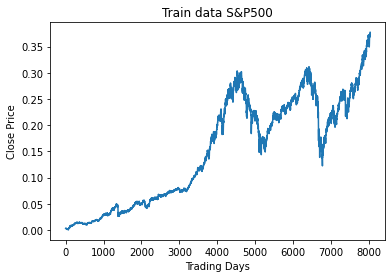

In [ ]:
import matplotlib.pyplot as plt

n_days=[]
n_days1=[]
for i in range(8031):
  n_days1.append(i)

# x axis values
x = n_days1
# corresponding y axis values
def Extract(lst):
    return [item[3] for item in lst]
y = Extract(train)
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Trading Days')
# naming the y axis
plt.ylabel('Close Price')
 
# giving a title to my graph
plt.title('Train data S&P500')
 
# function to show the plot
plt.show()

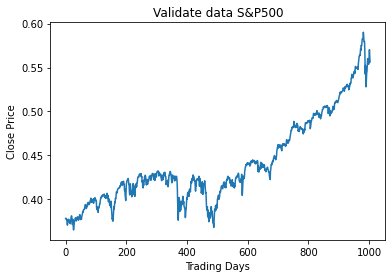

In [ ]:
n_days=[]
n_days1=[]
for i in range(1004):
  n_days1.append(i)

# x axis values
x = n_days1
# corresponding y axis values
y = Extract(validate)
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Trading Days')
# naming the y axis
plt.ylabel('Close Price')
 
# giving a title to my graph
plt.title('Validate data S&P500')
 
# function to show the plot
plt.show()

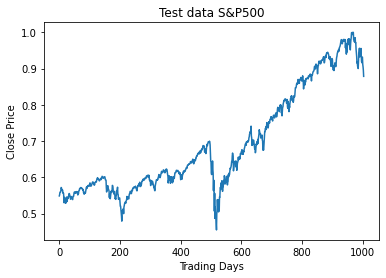

In [ ]:
n_days=[]
n_days1=[]
for i in range(1004):
  n_days1.append(i)

# x axis values
x = n_days1
# corresponding y axis values
y = Extract(test)
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('Trading Days')
# naming the y axis
plt.ylabel('Close Price')
 
# giving a title to my graph
plt.title('Test data S&P500')
 
# function to show the plot
plt.show()

The data has been normalized using linear scaling (x-xmin)/(xmax-xmin)
Now we need to build and train different neural networks using the normalized data.


In [ ]:
X_train = []
y_train = []
for i in range(200, 8031):
    X_train.append(train[i-200:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train)
print(X_train.shape)

[[[0.00287957]
  [0.00318795]
  [0.00328152]
  ...
  [0.00920442]
  [0.00906405]
  [0.00958935]]

 [[0.00318795]
  [0.00328152]
  [0.00348781]
  ...
  [0.00906405]
  [0.00958935]
  [0.00963189]]

 [[0.00328152]
  [0.00348781]
  [0.00354311]
  ...
  [0.00958935]
  [0.00963189]
  [0.00989347]]

 ...

 [[0.32894098]
  [0.33084225]
  [0.32964704]
  ...
  [0.37076494]
  [0.37057566]
  [0.37274916]]

 [[0.33084225]
  [0.32964704]
  [0.33246706]
  ...
  [0.37057566]
  [0.37274916]
  [0.37329361]]

 [[0.32964704]
  [0.33246706]
  [0.33257127]
  ...
  [0.37274916]
  [0.37329361]
  [0.37149652]]]
(7831, 200, 1)


In [ ]:
X_test = []
y_test = []
for i in range(200, 1004):
    X_test.append(test[i-200:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test)
print(X_test.shape)
print(y_test.shape)

[[[0.55566782]
  [0.54368802]
  [0.54840298]
  ...
  [0.54486836]
  [0.54354768]
  [0.54364763]]

 [[0.54368802]
  [0.54840298]
  [0.55884938]
  ...
  [0.54354768]
  [0.54364763]
  [0.5374759 ]]

 [[0.54840298]
  [0.55884938]
  [0.55459595]
  ...
  [0.54364763]
  [0.5374759 ]
  [0.52919662]]

 ...

 [[0.86487505]
  [0.87363705]
  [0.87745455]
  ...
  [0.92019932]
  [0.92582877]
  [0.92589471]]

 [[0.87363705]
  [0.87745455]
  [0.86087677]
  ...
  [0.92582877]
  [0.92589471]
  [0.91069079]]

 [[0.87745455]
  [0.86087677]
  [0.85666799]
  ...
  [0.92589471]
  [0.91069079]
  [0.89966811]]]
(804, 200, 1)
(804,)


In [ ]:
X_validate = []
y_validate = []
for i in range(200, 1004):
    X_validate.append(validate[i-200:i, 0])
    y_validate.append(validate[i, 0])
X_validate, y_validate = np.array(X_validate), np.array(y_validate)

#X_validate = np.reshape(X_validate, (X_validate.shape[0], X_validate.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
245/245 [==============================] - 24s 87ms/step - loss: 0.0114
Epoch 2/20
245/245 [==============================] - 22s 88ms/step - loss: 0.0103
Epoch 3/20
245/245 [==============================] - 24s 98ms/step - loss: 0.0103
Epoch 4/20
245/245 [==============================] - 22s 88ms/step - loss: 0.0102
Epoch 5/20
245/245 [==============================] - 22s 89ms/step - loss: 0.0102
Epoch 6/20
245/245 [==============================] - 22s 89ms/step - loss: 0.0102
Epoch 7/20
245/245 [==============================] - 22s 91ms/step - loss: 0.0101
Epoch 8/20
245/245 [==============================] - 22s 90ms/step - loss: 0.0101
Epoch 9/20
245/245 [==============================] - 22s 91ms/step - loss: 0.0101
Epoch 10/20
245/245 [==============================] - 22s 90ms/step - loss: 0.0101
Epoch 11/20
245/245 [==============================] - 22s 88ms/step - loss: 0.0101
Epoch 12/20
245/245 [==============================] - 22s 91ms/step - loss: 0.0101
E

In [ ]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test) 


In [ ]:
validate_predict = regressor.predict(X_validate)

In [ ]:
print(train_predict)
print(train_predict.shape)
train_predict = np.reshape(train_predict, (train_predict[0],train_predict[1]))

[[[0.15083511]
  [0.15218318]
  [0.15083386]
  ...
  [0.14930525]
  [0.14930755]
  [0.14930254]]

 [[0.15083359]
  [0.15218717]
  [0.15083793]
  ...
  [0.14930755]
  [0.14930254]
  [0.14930731]]

 [[0.15083314]
  [0.15218751]
  [0.15084176]
  ...
  [0.14930254]
  [0.14930731]
  [0.14931104]]

 ...

 [[0.1492196 ]
  [0.15518679]
  [0.15772052]
  ...
  [0.1585792 ]
  [0.15858963]
  [0.15857723]]

 [[0.14921008]
  [0.15521973]
  [0.15771154]
  ...
  [0.15858963]
  [0.15857723]
  [0.15859823]]

 [[0.14921607]
  [0.15518837]
  [0.15773627]
  ...
  [0.15857723]
  [0.15859823]
  [0.15863267]]]
(7831, 200, 1)


TypeError: ignored

In [ ]:
train_predict = sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)
validate_predict = sc.inverse_transform(validate_predict)

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
  
# calculate MAE
train_error = mae(y_train, train_predict)
test_error = mae(y_test, test_predict)
validate_error = mae(y_validate, validate_predict)
# display
print(train_error)
print(test_error)
print(validate_error)

ValueError: ignored